In [1]:
# import sys
# from PIL import Image
# sys.modules['Image'] = Image 

In [2]:
# from PIL import Image
# print(Image.__file__)

In [3]:
# import Image
# print(Image.__file__)

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [10]:
# !pip install -U numpy
!pwd

/tf/galvanize/capstones/capstone_2/capstone2/src


In [2]:
!pip install sklearn

     |████████████████████████████████| 6.8 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 5.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=0cf3275f2a6460c70212ee9798dd8e9893958e8c4cab6820ff2e0e8ac958dcfc
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:

!pip install scipy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install Pillow

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
!pip install scikit-image

     |████████████████████████████████| 12.4 MB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 10.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=7168)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
!nvidia-smi

Thu Dec  3 18:15:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 455.38       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 207...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    21W /  N/A |    652MiB /  7982MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [7]:
!pip install matplotlib

In [7]:
#!python
#!/usr/bin/env python
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import PIL

In [16]:
# zappostesttrain_dir = '../data/ut-zap50k-data/train-test-splits'
# x = loadmat(zappostesttrain_dir)

In [17]:
# type(x)

In [18]:
# x.keys()

In [19]:
# train_index = x['trainIndexAll']
# test_index = x['testIndexAll']

In [20]:
# train_index[0][0][0].shape

In [21]:
# zapposimagepath_dir = '../data/ut-zap50k-data/image-path.mat'

In [22]:
# imagepathdata = loadmat(zapposimagepath_dir)

In [23]:
# imagepathdata

In [24]:
# imagepathdata.get('imagepath')[1000][0][0]

In [13]:
image = Image.open('../data/ut-zap50k-data/ut-zap50k-images-square/Boots/7965307.5291.jpg')

In [14]:
image.show()

In [27]:
# np.asarray(image)

In [28]:
# image.getpixel((0,0))

In [29]:
# zapposlabels_dir = '../data/ut-zap50k-data/zappos-labels.mat'
# zapposlabels = loadmat(zapposlabels_dir)

In [30]:
# dir(zapposlabels)

In [31]:
# zapposlabels.keys()

In [32]:
# #build pipeline as if for one image, then extend it with either function or class
# class imagePipeline:
#     def __init__(self,imagepath):
#         self.imagepath = imagepath
#         self.image = Image.open(imagepath)
#     def as_array(self):
#         return np.asarray(self.image)

In [33]:
# img_arrays = []
# for i in imagepathdata.get('imagepath'):
#     imagepath = '../data/ut-zap50k-data/ut-zap50k-images-square/' + i[0][0]
#     image = imagePipeline(imagepath).as_array()
#     img_arrays.append(image)

In [6]:
import os
import shutil
def sub_subfolder(mainpath,subpath,catlist): #subpath i.e. "boot" ... catlist = [over knee, etc...]
    subs = []
    for i in catlist:
        folder = mainpath + subpath + i
        subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
        for sub in subfolders:
            for f in os.listdir(sub):
                src = os.path.join(sub, f)
                dst = os.path.join(folder, f)
                shutil.move(src, dst)
            shutil.rmtree(sub)
                


In [35]:
# main_path = '../data/ut-zap50k-data/ut-zap50k-images-square/'
# bootcat_list = os.listdir('../data/ut-zap50k-data/ut-zap50k-images-square/Boots')
# sub_subfolder(main_path,'Boots/',bootcat_list)

In [36]:
# sandalcat_list = os.listdir('../data/ut-zap50k-data/ut-zap50k-images-square/Sandals')
# sub_subfolder(main_path,'Sandals/',sandalcat_list)

In [37]:
# shoecat_list = os.listdir('../data/ut-zap50k-data/ut-zap50k-images-square/Shoes')
# sub_subfolder(main_path,'Shoes/',shoecat_list)

In [38]:
# slippercat_list = os.listdir('../data/ut-zap50k-data/ut-zap50k-images-square/Slippers')
# sub_subfolder(main_path,'Slippers/',slippercat_list)

In [39]:
# main_path2 = '../data/ut-zap50k-data/'
# imagescat_list = os.listdir('../data/ut-zap50k-data/ut-zap50k-images-square')
# sub_subfolder(main_path2,'ut-zap50k-images-square/',imagescat_list)

In [40]:
# directory = '../data/ut-zap50k-data/ut-zap50k-images-square/'
# img_prepocessing = keras.preprocessing.image_dataset_from_directory(
#     directory,
#     labels="inferred",
#     label_mode="int",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
# )

In [41]:
# img_prepocessing.class_names

In [42]:
# root_dir = '../data/ut-zap50k-data/ut-zap50k-images-square'
# Cls_boots = '/Boots'
# Cls_sandals = '/Sandals'
# Cls_shoes = '/Shoes'
# Cls_slippers = '/Slippers'
# Cls_lst = [Cls_boots,Cls_sandals,Cls_shoes,Cls_slippers]

In [43]:
# os.makedirs(root_dir +'/train' + Cls_boots)
# os.makedirs(root_dir +'/train' + Cls_sandals)
# os.makedirs(root_dir +'/train' + Cls_shoes)
# os.makedirs(root_dir +'/train' + Cls_slippers)

In [44]:
# os.makedirs(root_dir +'/val' + Cls_boots)
# os.makedirs(root_dir +'/val' + Cls_sandals)
# os.makedirs(root_dir +'/val' + Cls_shoes)
# os.makedirs(root_dir +'/val' + Cls_slippers)

In [45]:
# os.makedirs(root_dir +'/test' + Cls_boots)
# os.makedirs(root_dir +'/test' + Cls_sandals)
# os.makedirs(root_dir +'/test' + Cls_shoes)
# os.makedirs(root_dir +'/test' + Cls_slippers)

In [46]:
# for i in Cls_lst:
#     src = "../data/ut-zap50k-data/ut-zap50k-images-square"+i # Folder to copy images from

#     allFileNames = os.listdir(src)
#     np.random.shuffle(allFileNames)
#     train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                               [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])
#     train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#     val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#     test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
#     print('Total images: ', len(allFileNames))
#     print('Training: ', len(train_FileNames))
#     print('Validation: ', len(val_FileNames))
#     # Copy-pasting images
#     for name in train_FileNames:
#         shutil.copy(name, "../data/ut-zap50k-data/ut-zap50k-images-square/train"+i)
#     for name in val_FileNames:
#         shutil.copy(name, "../data/ut-zap50k-data/ut-zap50k-images-square/val"+i)
#     for name in test_FileNames:
#         shutil.copy(name, "../data/ut-zap50k-data/ut-zap50k-images-square/test"+i)

In [29]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../data/ut-zap50k-data/ut-zap50k-images-square/train',
        target_size=(136, 102),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '../data/ut-zap50k-data/ut-zap50k-images-square/val',
        target_size=(136, 102),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_generator = test_datagen.flow_from_directory(
        '../data/ut-zap50k-data/ut-zap50k-images-square/test',
        target_size=(136, 102),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
train_generator

Found 35020 images belonging to 4 classes.
Found 7504 images belonging to 4 classes.
Found 7507 images belonging to 4 classes.


In [15]:
#what loss functions / filters/ kernel size to use

def define_model(kernel_size=(4,4), input_shape=[136,102,3], pool_size=2, nb_classes=4):
    model = Sequential() 
    model.add(Conv2D(32, (kernel_size[0], kernel_size[1]),
                        padding='valid', 
                        input_shape=input_shape)) #first conv. layer
    model.add(Activation('relu')) 
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) 
    model.add(Dropout(0.2))
    model.add(Flatten())
    print('Model flattened out to ', model.output_shape)
    model.add(Dense(32)) 
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [9]:
# model = define_model()
# model = keras.models.load_model("weights.37-0.810.hdf5")
# model.summary()
input_shape=[136,102,3]
model = Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(4)
])
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir(root_logdir):
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir(root_logdir)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [11]:
#going to need speficic steps for epochs, steps_per_epoch, validation_steps
#look up early-stopping callback (to help set really high number for epochs so it stops once it reaches the best)

checkpoint_filepath = './weights.{epoch:02d}-{accuracy:.3f}.hdf5'
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True, monitor = 'val_loss')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 136, 102, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 68, 51, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 51, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 12, 64)        0

In [13]:
history = model.fit(
        train_generator,
        steps_per_epoch=35020//32,
        epochs=1000,
        validation_data=validation_generator,
        validation_steps=7504//32)

Epoch 1/1000


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Relu (defined at <ipython-input-13-5793d6b6862a>:6) ]] [Op:__inference_train_function_940]

Function call stack:
train_function


In [ ]:
# from numba import cuda

In [ ]:
y_hat = model.predict(test_generator)

In [ ]:
# dir(test_generator)

In [ ]:
class_idx = np.array(list(test_generator.class_indices.keys()))

In [ ]:
# class_idx

In [ ]:
y_hat = np.argmax(y_hat, axis = 1)
# y_hat

In [ ]:
# class_idx[np.argmax(y_hat, axis = 1)]

In [ ]:
y_true = test_generator.labels
# y_true

In [ ]:
sum(y_hat == y_true) / len(y_true)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true,y_hat)

rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True


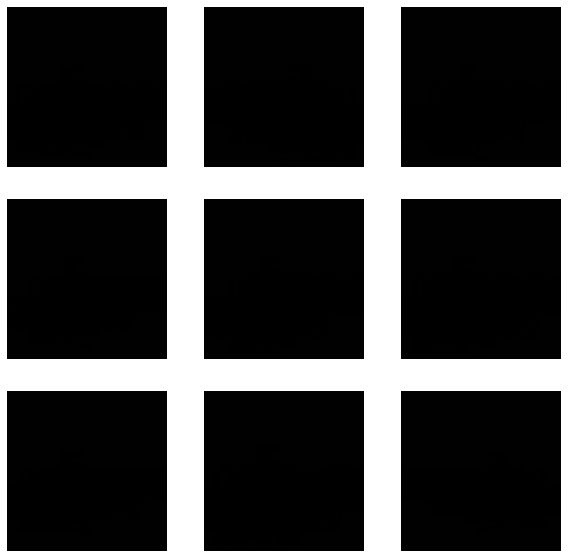

In [31]:
print('rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/ut-zap50k-data/ut-zap50k-images-square/Sandals/102307.298.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
# show the figure
pyplot.show()